In [1]:
# D208 Code

In [2]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
%matplotlib inline
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm


C:\Users\bower\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
# Import csv dataset

medical_data = pd.read_csv(r"C:\Users\bower\OneDrive\Desktop\WGU\D208\3kfid8emf9rkc9ek30sf (2)\medical_clean.csv")

In [4]:
medical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

In [5]:
# Create New DataFrame with target and explanatory variables

df_medical = pd.DataFrame(medical_data[['TotalCharge','Age','Income','VitD_levels','Doc_visits','Initial_days','Additional_charges', 'Initial_admin','Services','Gender','Children','Marital']])

In [6]:
# Get info from the data / check for null values

df_medical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   TotalCharge         10000 non-null  float64
 1   Age                 10000 non-null  int64  
 2   Income              10000 non-null  float64
 3   VitD_levels         10000 non-null  float64
 4   Doc_visits          10000 non-null  int64  
 5   Initial_days        10000 non-null  float64
 6   Additional_charges  10000 non-null  float64
 7   Initial_admin       10000 non-null  object 
 8   Services            10000 non-null  object 
 9   Gender              10000 non-null  object 
 10  Children            10000 non-null  int64  
 11  Marital             10000 non-null  object 
dtypes: float64(5), int64(3), object(4)
memory usage: 937.6+ KB


In [7]:
# Get info from the data

df_medical.describe()

,TotalCharge,Age,Income,VitD_levels,Doc_visits,Initial_days,Additional_charges,Children
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5312.172769,53.511700,40490.495160,17.964262,5.012200,34.455299,12934.528587,2.097200
std,2180.393838,20.638538,28521.153293,2.017231,1.045734,26.309341,6542.601544,2.163659
min,1938.312067,18.000000,154.080000,9.806483,1.000000,1.001981,3125.703000,0.000000
25%,3179.374015,36.000000,19598.775000,16.626439,4.000000,7.896215,7986.487755,0.000000
50%,5213.952000,53.000000,33768.420000,17.951122,5.000000,35.836244,11573.977735,1.000000
75%,7459.699750,71.000000,54296.402500,19.347963,6.000000,61.161020,15626.490000,3.000000
max,9180.728000,89.000000,207249.100000,26.394449,9.000000,71.981490,30566.070000,10.000000


Outliers Present


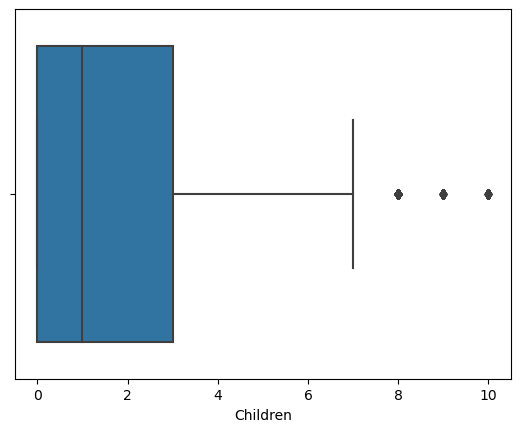

In [8]:
# Detect outliers with visualisations

boxplot = sns.boxplot(x='Children', data=df_medical)

# Outliers Need Treatment

print("Outliers Present")

No Outliers


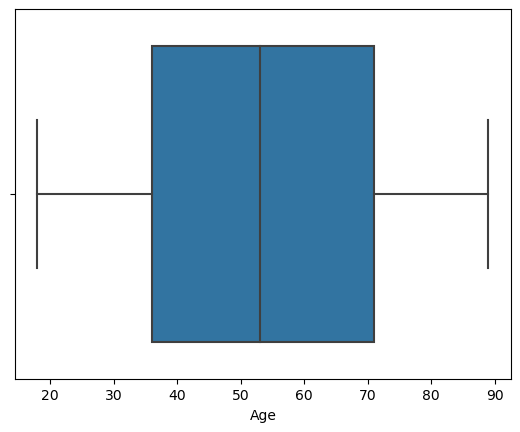

In [9]:
# Detect outliers with visualisations

boxplot = sns.boxplot(x='Age', data=df_medical)

# No Outliers

print("No Outliers")

Outliers Present


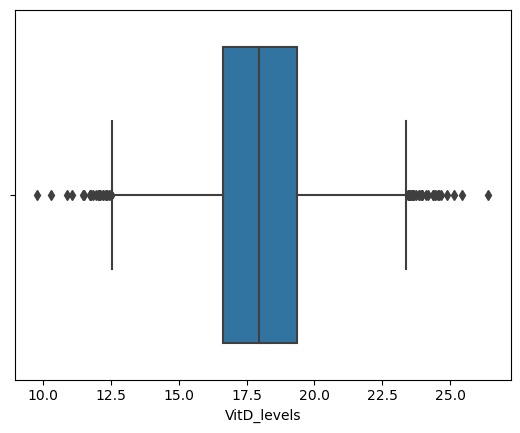

In [10]:
# Detect outliers with visualisations

boxplot = sns.boxplot(x='VitD_levels', data=df_medical)

# Outliers Need Treatment

print("Outliers Present")

No Outliers


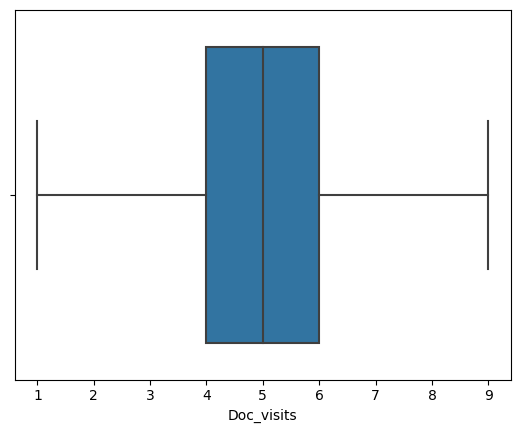

In [11]:
# Detect outliers with visualisations

boxplot = sns.boxplot(x='Doc_visits', data=df_medical)

# No Outliers

print("No Outliers")

No Outliers


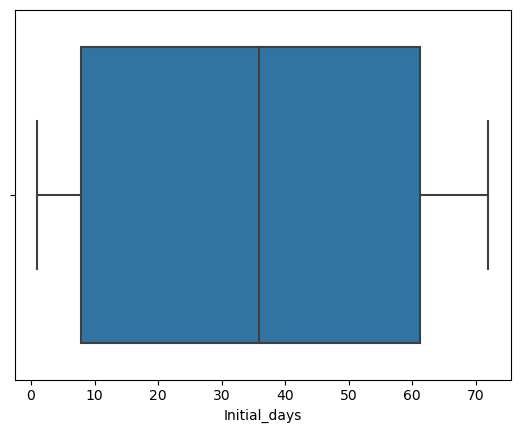

In [12]:


# Detect outliers with visualisations

boxplot = sns.boxplot(x='Initial_days', data=df_medical)

# No Outliers

print("No Outliers")

Outliers


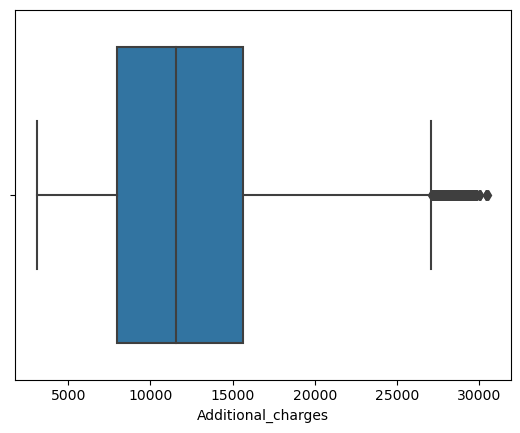

In [13]:
# Detect outliers with visualisations

boxplot = sns.boxplot(x='Additional_charges', data=df_medical)

# Outliers Need Treatment

print("Outliers")

Outliers


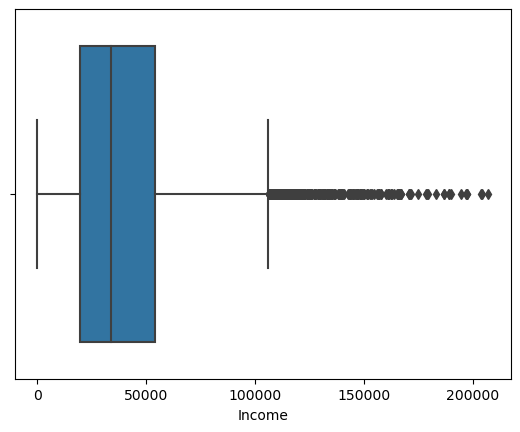

In [14]:
# Detect outliers with visualisations

boxplot = sns.boxplot(x='Income', data=df_medical)

# Outliers Need Treatment

print("Outliers")

No Outliers


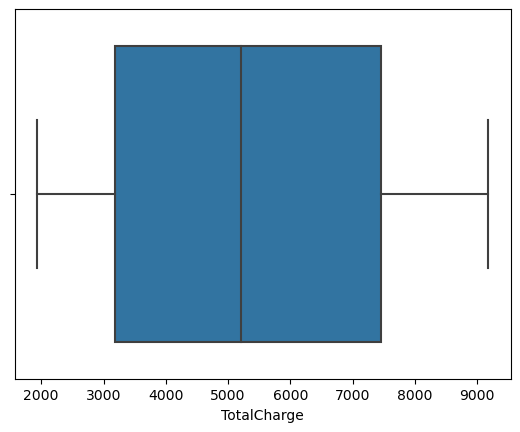

In [15]:
# Detect outliers with visualisations

boxplot = sns.boxplot(x='TotalCharge', data=df_medical)

# No Outliers

print("No Outliers")

In [16]:
# Print out which variables have outliers

outliers_med = "These features have outliers: Income, Additional_charges, VitD_levels, Children"
outliers_med

'These features have outliers: Income, Additional_charges, VitD_levels, Children'

In [17]:
# Remove Outliers from Income

df_medical['Income'] = np.where(df_medical['Income'] > 100000, np.nan, df_medical['Income'])

In [18]:
df_medical['Income'].max()

99994.94

In [19]:
df_medical['Income'] = np.where(df_medical['Income'] > 99994.94, np.nan, df_medical['Income'])

In [20]:
df_medical['Income'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10000 entries, 0 to 9999
Series name: Income
Non-Null Count  Dtype  
--------------  -----  
9569 non-null   float64
dtypes: float64(1)
memory usage: 78.3 KB


In [21]:
df_medical['Income'].max

<bound method Series.max of 0       86575.93
1       46805.99
2       14370.14
3       39741.49
4        1209.56
          ...   
9995    45967.61
9996    14983.02
9997    65917.81
9998    29702.32
9999    62682.63
Name: Income, Length: 10000, dtype: float64>

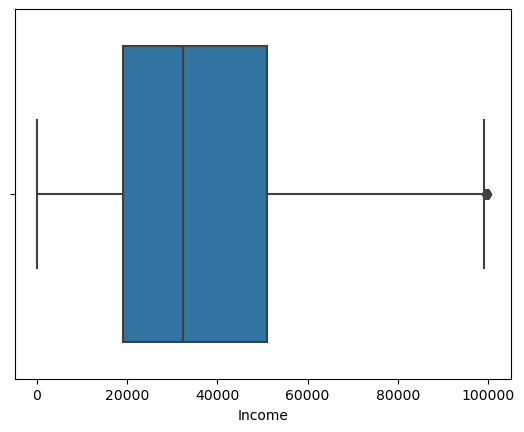

In [22]:
boxplot = sns.boxplot(x='Income', data=df_medical)

In [23]:
df_medical['Income'] = np.where(df_medical['Income'] > 86575.93, np.nan, df_medical['Income'])

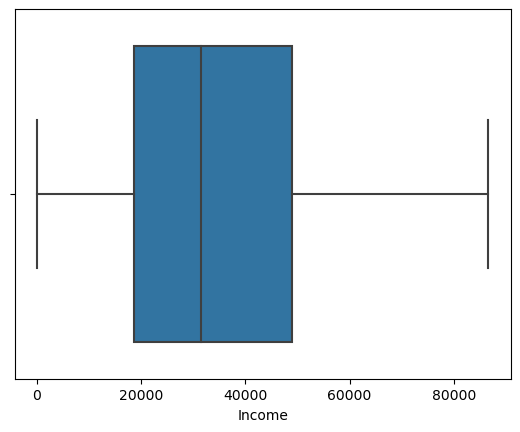

In [24]:
# Updated box plot for Income

boxplot = sns.boxplot(x='Income', data=df_medical)

In [25]:
# recheck which features need outliers removed after Income

print(outliers_med)

These features have outliers: Income, Additional_charges, VitD_levels, Children


In [26]:
df_medical['Additional_charges'].describe()

count    10000.000000
mean     12934.528587
std       6542.601544
min       3125.703000
25%       7986.487755
50%      11573.977735
75%      15626.490000
max      30566.070000
Name: Additional_charges, dtype: float64

In [27]:
# Remove outliers from Additional_charges

df_medical['Additional_charges'] = np.where(df_medical['Additional_charges'] > 19250, np.nan, df_medical['Additional_charges'])

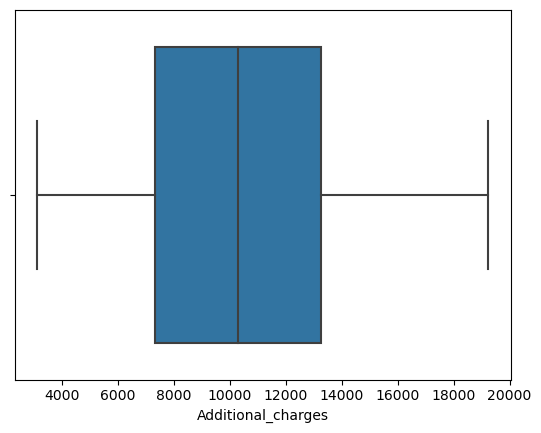

In [28]:
# Updated boxplot for Additional_charges

boxplot = sns.boxplot(x='Additional_charges', data=df_medical)

In [29]:
df_medical['Additional_charges'].describe()

count     8168.000000
mean     10363.712577
std       3795.954992
min       3125.703000
25%       7342.685306
50%      10280.672745
75%      13265.712400
max      19241.610000
Name: Additional_charges, dtype: float64

In [30]:
# Recheck which outliers are remaining

print(outliers_med)

These features have outliers: Income, Additional_charges, VitD_levels, Children


In [31]:
df_medical['VitD_levels'].describe()

count    10000.000000
mean        17.964262
std          2.017231
min          9.806483
25%         16.626439
50%         17.951122
75%         19.347963
max         26.394449
Name: VitD_levels, dtype: float64

In [32]:
# Remove outliers in VitD_levels

df_medical['VitD_levels'] = np.where(df_medical['VitD_levels'] < 12.769, np.nan, df_medical['VitD_levels'])

In [33]:
df_medical['VitD_levels'] = np.where(df_medical['VitD_levels'] > 23, np.nan, df_medical['VitD_levels'])

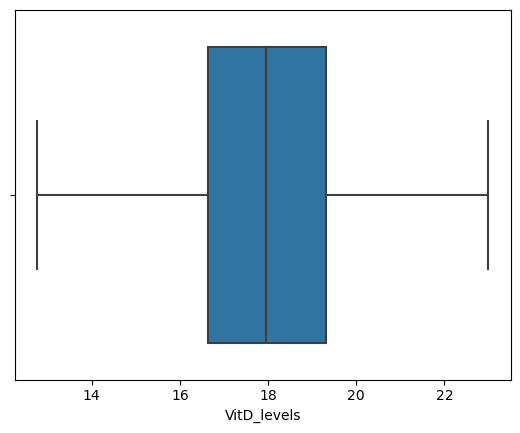

In [34]:
boxplot = sns.boxplot(x='VitD_levels', data=df_medical)

In [35]:
df_medical['VitD_levels'].describe()

count    9896.000000
mean       17.951143
std         1.939171
min        12.769244
25%        16.634665
50%        17.945038
75%        19.322643
max        22.994987
Name: VitD_levels, dtype: float64

In [36]:
# Recheck which outliers are remaining

print(outliers_med)

These features have outliers: Income, Additional_charges, VitD_levels, Children


In [37]:
# Remove outliers for Children

df_medical['Children'].describe()

count    10000.000000
mean         2.097200
std          2.163659
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max         10.000000
Name: Children, dtype: float64

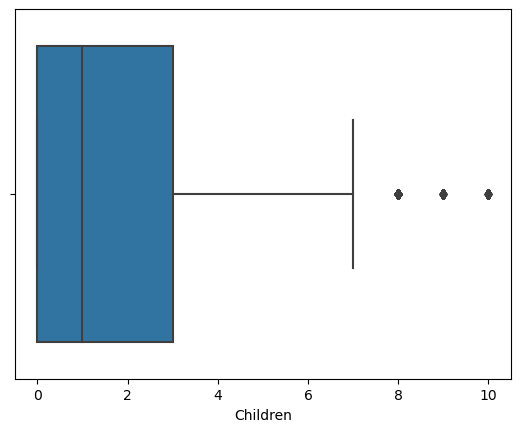

In [38]:
boxplot = sns.boxplot(x='Children', data=df_medical)

In [39]:
df_medical['Children'] = np.where(df_medical['Children'] > 7, np.nan, df_medical['Children'])

count    9589.000000
mean        1.813328
std         1.700875
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max         7.000000
Name: Children, dtype: float64

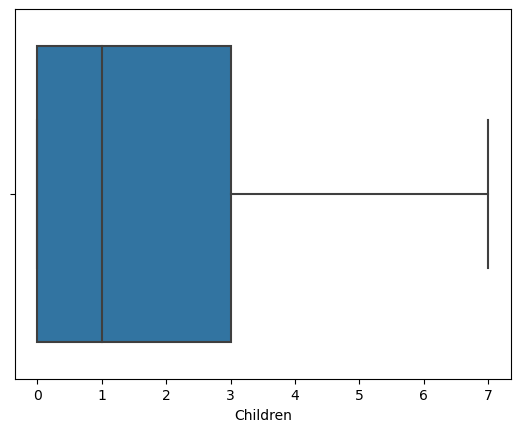

In [40]:
boxplot = sns.boxplot(x='Children', data=df_medical)
df_medical['Children'].describe()

# All outliers are removed

In [41]:
# Summary statistics for each variable

df_medical['TotalCharge'].describe()

count    10000.000000
mean      5312.172769
std       2180.393838
min       1938.312067
25%       3179.374015
50%       5213.952000
75%       7459.699750
max       9180.728000
Name: TotalCharge, dtype: float64

In [42]:
df_medical['Age'].describe()

count    10000.000000
mean        53.511700
std         20.638538
min         18.000000
25%         36.000000
50%         53.000000
75%         71.000000
max         89.000000
Name: Age, dtype: float64

In [43]:
df_medical['Income'].describe()

count     9275.000000
mean     34982.387545
std      20423.959722
min        154.080000
25%      18676.320000
50%      31538.950000
75%      48870.655000
max      86575.930000
Name: Income, dtype: float64

In [44]:
df_medical['VitD_levels'].describe()

count    9896.000000
mean       17.951143
std         1.939171
min        12.769244
25%        16.634665
50%        17.945038
75%        19.322643
max        22.994987
Name: VitD_levels, dtype: float64

In [45]:
df_medical['Doc_visits'].describe()

count    10000.000000
mean         5.012200
std          1.045734
min          1.000000
25%          4.000000
50%          5.000000
75%          6.000000
max          9.000000
Name: Doc_visits, dtype: float64

In [46]:
df_medical['Initial_days'].describe()

count    10000.000000
mean        34.455299
std         26.309341
min          1.001981
25%          7.896215
50%         35.836244
75%         61.161020
max         71.981490
Name: Initial_days, dtype: float64

In [47]:
df_medical['Additional_charges'].describe()

count     8168.000000
mean     10363.712577
std       3795.954992
min       3125.703000
25%       7342.685306
50%      10280.672745
75%      13265.712400
max      19241.610000
Name: Additional_charges, dtype: float64

In [48]:
df_medical['Children'].describe()

count    9589.000000
mean        1.813328
std         1.700875
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max         7.000000
Name: Children, dtype: float64

In [49]:
df_medical['Initial_admin'].value_counts()

Initial_admin
Emergency Admission      5060
Elective Admission       2504
Observation Admission    2436
Name: count, dtype: int64

In [50]:
df_medical['Services'].value_counts()

Services
Blood Work     5265
Intravenous    3130
CT Scan        1225
MRI             380
Name: count, dtype: int64

In [51]:
df_medical['Gender'].value_counts()

Gender
Female       5018
Male         4768
Nonbinary     214
Name: count, dtype: int64

In [52]:
df_medical['Marital'].value_counts()

Marital
Widowed          2045
Married          2023
Separated        1987
Never Married    1984
Divorced         1961
Name: count, dtype: int64

In [53]:
df_medical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   TotalCharge         10000 non-null  float64
 1   Age                 10000 non-null  int64  
 2   Income              9275 non-null   float64
 3   VitD_levels         9896 non-null   float64
 4   Doc_visits          10000 non-null  int64  
 5   Initial_days        10000 non-null  float64
 6   Additional_charges  8168 non-null   float64
 7   Initial_admin       10000 non-null  object 
 8   Services            10000 non-null  object 
 9   Gender              10000 non-null  object 
 10  Children            9589 non-null   float64
 11  Marital             10000 non-null  object 
dtypes: float64(6), int64(2), object(4)
memory usage: 937.6+ KB


In [54]:
# Imputation of Income, VitD_levels, Additional_charges, Children

# Impute the median for Income outliers

df_medical['Income'].fillna(df_medical['Income'].median(), inplace=True)
df_medical['VitD_levels'].fillna(df_medical['VitD_levels'].median(), inplace=True)
df_medical['Additional_charges'].fillna(df_medical['Additional_charges'].median(), inplace=True)
df_medical['Children'].fillna(df_medical['Children'].median(), inplace=True)

C:\Users\bower\AppData\Local\Temp\ipykernel_24084\3504939577.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_medical['Income'].fillna(df_medical['Income'].median(), inplace=True)
C:\Users\bower\AppData\Local\Temp\ipykernel_24084\3504939577.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beh

In [55]:
df_medical.info()

# All nulls are removed, All outliers are removed. Imputation successful

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   TotalCharge         10000 non-null  float64
 1   Age                 10000 non-null  int64  
 2   Income              10000 non-null  float64
 3   VitD_levels         10000 non-null  float64
 4   Doc_visits          10000 non-null  int64  
 5   Initial_days        10000 non-null  float64
 6   Additional_charges  10000 non-null  float64
 7   Initial_admin       10000 non-null  object 
 8   Services            10000 non-null  object 
 9   Gender              10000 non-null  object 
 10  Children            10000 non-null  float64
 11  Marital             10000 non-null  object 
dtypes: float64(6), int64(2), object(4)
memory usage: 937.6+ KB


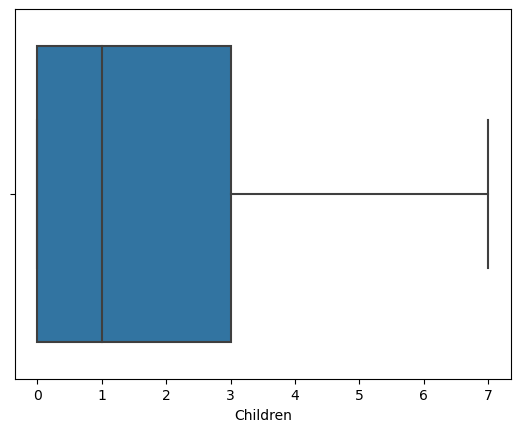

In [56]:
boxplot = sns.boxplot(x='Children', data=df_medical)

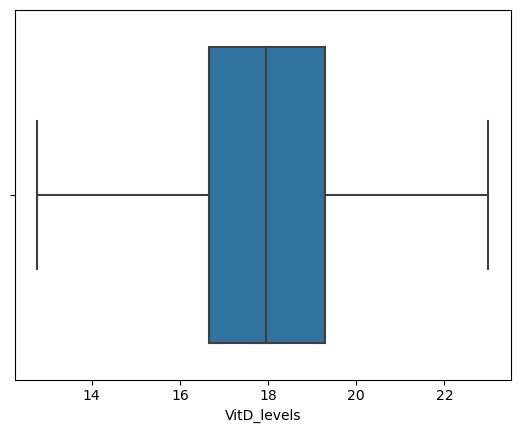

In [57]:
boxplot = sns.boxplot(x='VitD_levels', data=df_medical)

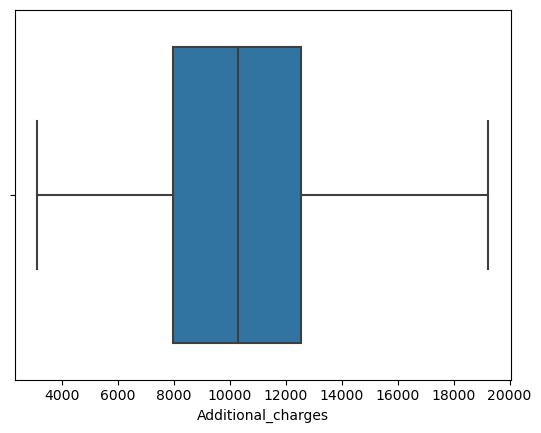

In [58]:
boxplot = sns.boxplot(x='Additional_charges', data=df_medical)

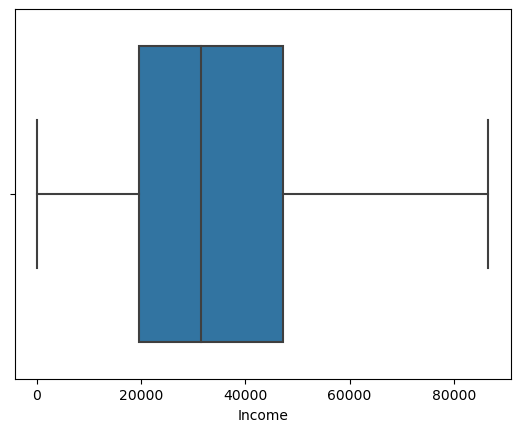

In [59]:
boxplot = sns.boxplot(x='Income', data=df_medical)

In [60]:
# Exploratory Data Analysis -----


In [61]:
# Univariate Analyses on explanatory numeric variables:

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Income'}>,
        <Axes: title={'center': 'VitD_levels'}>],
       [<Axes: title={'center': 'Doc_visits'}>,
        <Axes: title={'center': 'Initial_days'}>,
        <Axes: title={'center': 'Additional_charges'}>],
       [<Axes: title={'center': 'Children'}>,
        <Axes: title={'center': 'TotalCharge'}>, <Axes: >]], dtype=object)

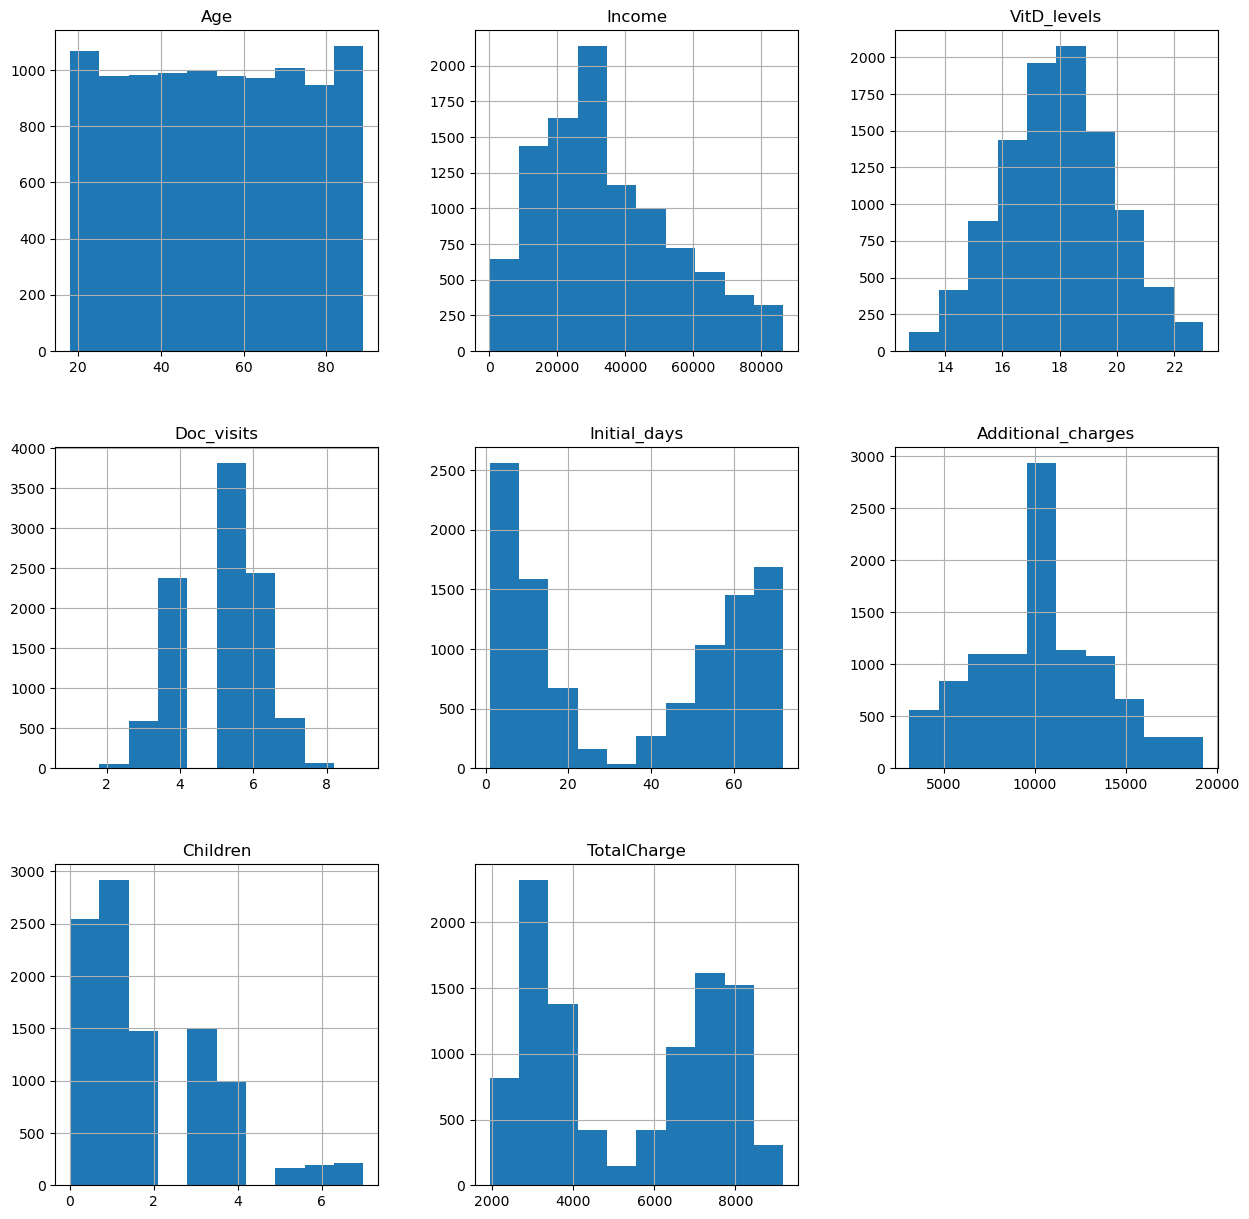

In [62]:
df_medical[['Age', 'Income', 'VitD_levels', 'Doc_visits', 'Initial_days', 'Additional_charges', 'Children', 'TotalCharge']].hist(figsize=(15,15))

In [63]:
# Univariate statistics for each numeric variable

df_medical[['Age', 'Income', 'VitD_levels', 'Doc_visits', 'Initial_days', 'Additional_charges', 'Children', 'TotalCharge']].describe()

,Age,Income,VitD_levels,Doc_visits,Initial_days,Additional_charges,Children,TotalCharge
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,53.511700,34732.738323,17.951080,5.012200,34.455299,10348.499680,1.779900,5312.172769
std,20.638538,19689.845053,1.929060,1.045734,26.309341,3430.781717,1.673361,2180.393838
min,18.000000,154.080000,12.769244,1.000000,1.001981,3125.703000,0.000000,1938.312067
25%,36.000000,19598.775000,16.656705,4.000000,7.896215,7986.487755,0.000000,3179.374015
50%,53.000000,31538.950000,17.945038,5.000000,35.836244,10280.672745,1.000000,5213.952000
75%,71.000000,47216.265000,19.300835,6.000000,61.161020,12537.427912,3.000000,7459.699750
max,89.000000,86575.930000,22.994987,9.000000,71.981490,19241.610000,7.000000,9180.728000


<Axes: xlabel='Age', ylabel='TotalCharge'>

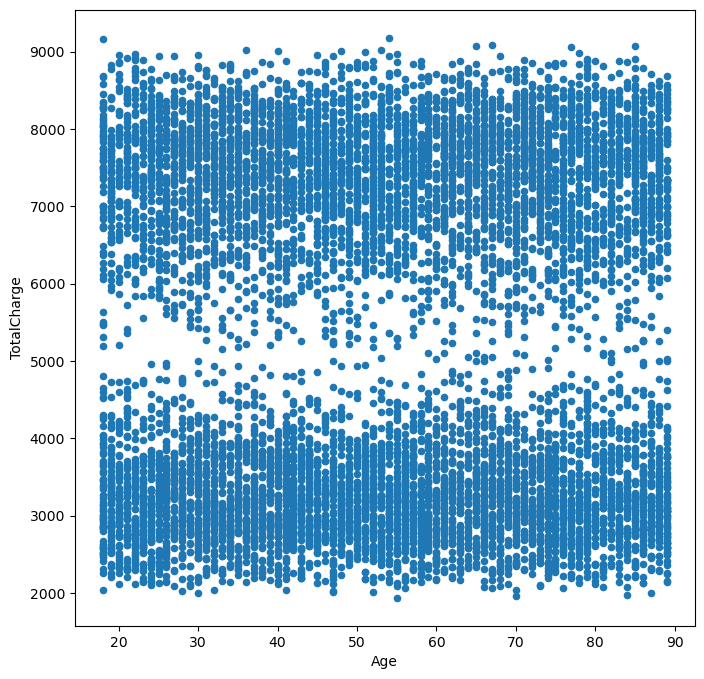

In [64]:
# Scatter plots for numeric variables

# Age scatter plot

df_medical.plot.scatter(x='Age', y='TotalCharge', marker = "o", figsize=(8,8))

<Axes: xlabel='Income', ylabel='TotalCharge'>

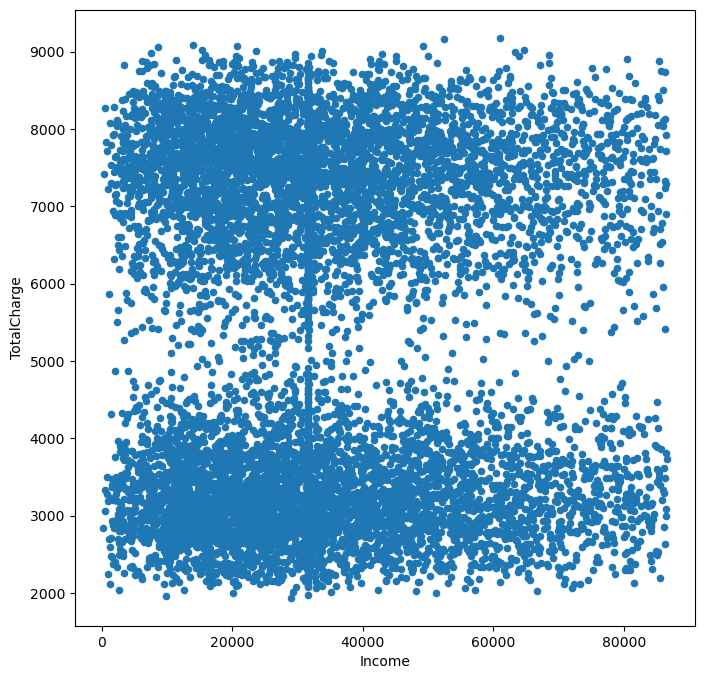

In [65]:
# Income scatter plot

df_medical.plot.scatter(x='Income', y='TotalCharge', marker = "o", figsize=(8,8))

<Axes: xlabel='VitD_levels', ylabel='TotalCharge'>

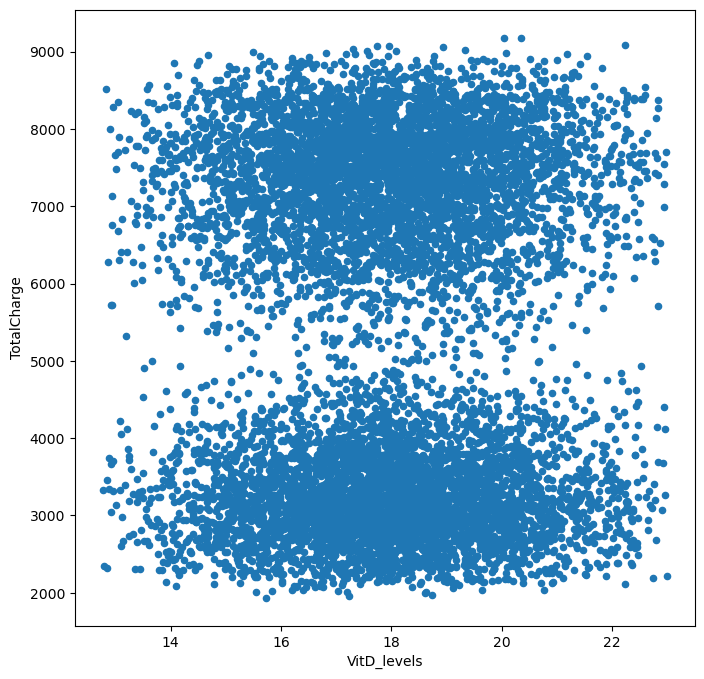

In [66]:
# VitD_levels scatter plot

df_medical.plot.scatter(x='VitD_levels', y='TotalCharge', marker = "o", figsize=(8,8))

<Axes: xlabel='Doc_visits', ylabel='TotalCharge'>

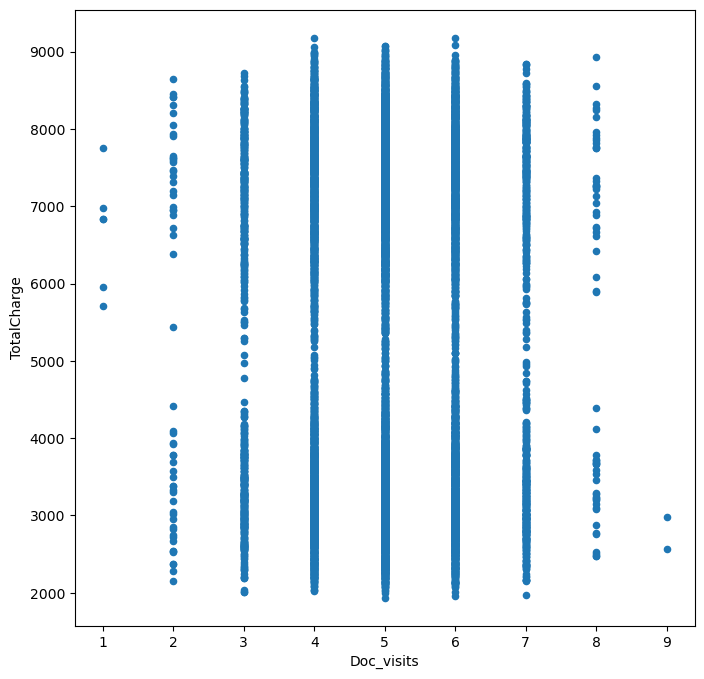

In [67]:
# Doc_visits scatter plot

df_medical.plot.scatter(x='Doc_visits', y='TotalCharge', marker = "o", figsize=(8,8))

<Axes: xlabel='Initial_days', ylabel='TotalCharge'>

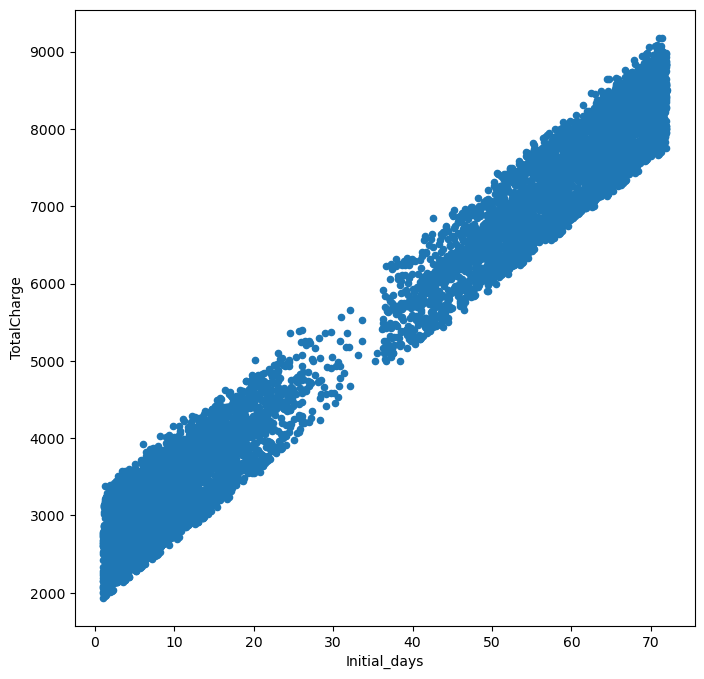

In [68]:
# Initial_days scatter plot

df_medical.plot.scatter(x='Initial_days', y='TotalCharge', marker = "o", figsize=(8,8))

<Axes: xlabel='Additional_charges', ylabel='TotalCharge'>

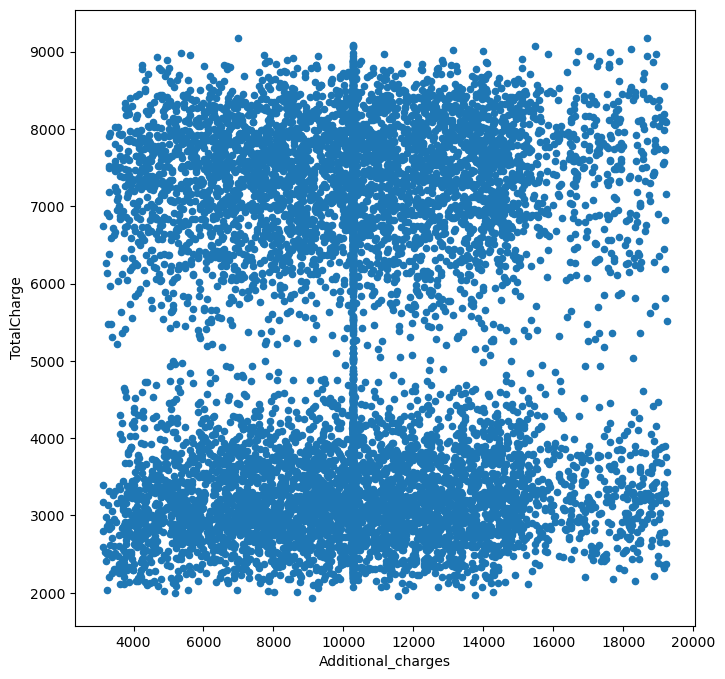

In [69]:
# Additional_charges scatter plot

df_medical.plot.scatter(x='Additional_charges', y='TotalCharge', marker = "o", figsize=(8,8))

<Axes: xlabel='Children', ylabel='TotalCharge'>

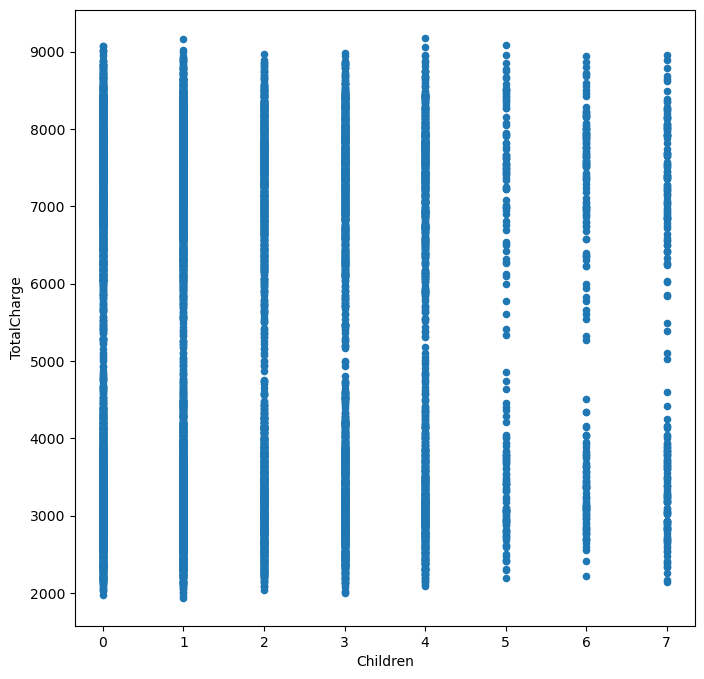

In [70]:
# Children scatter plot

df_medical.plot.scatter(x='Children', y='TotalCharge', marker = "o", figsize=(8,8))

In [71]:
# Univariate Analyses of Categorical Variables Services, Initial_admin, Gender, Marital


Services
Blood Work     5265
Intravenous    3130
CT Scan        1225
MRI             380
Name: count, dtype: int64

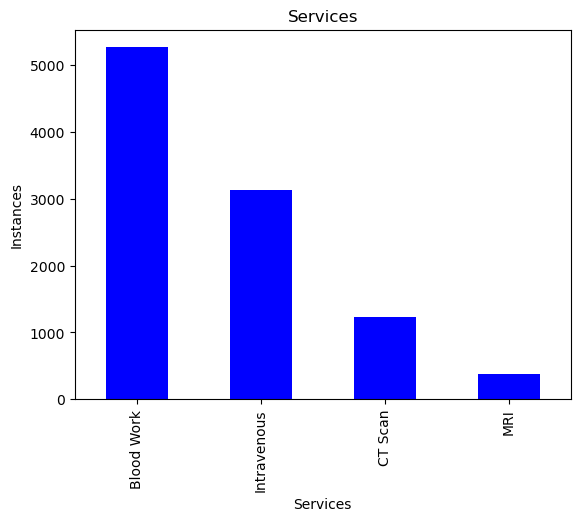

In [72]:
# Services

df_medical['Services'].value_counts().plot(kind='bar', color="Blue", xlabel='Services', ylabel="Instances", title="Services")

df_medical['Services'].value_counts()

Initial_admin
Emergency Admission      5060
Elective Admission       2504
Observation Admission    2436
Name: count, dtype: int64

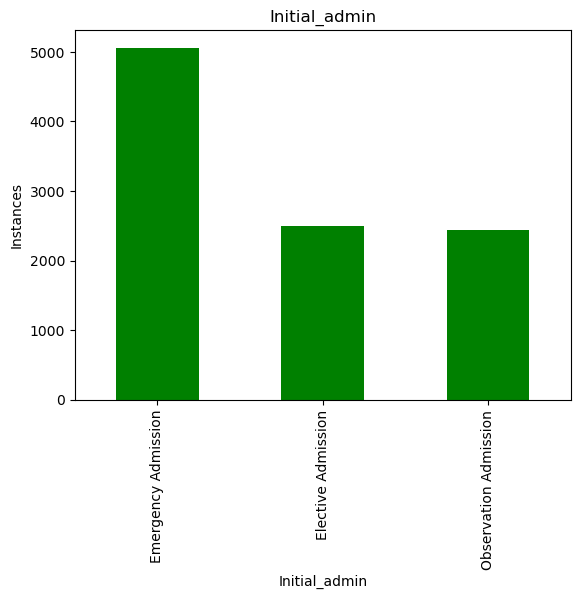

In [73]:
# Initial_admin

df_medical['Initial_admin'].value_counts().plot(kind='bar', color="Green", xlabel='Initial_admin', ylabel="Instances", title="Initial_admin")

df_medical['Initial_admin'].value_counts()

Gender
Female       5018
Male         4768
Nonbinary     214
Name: count, dtype: int64

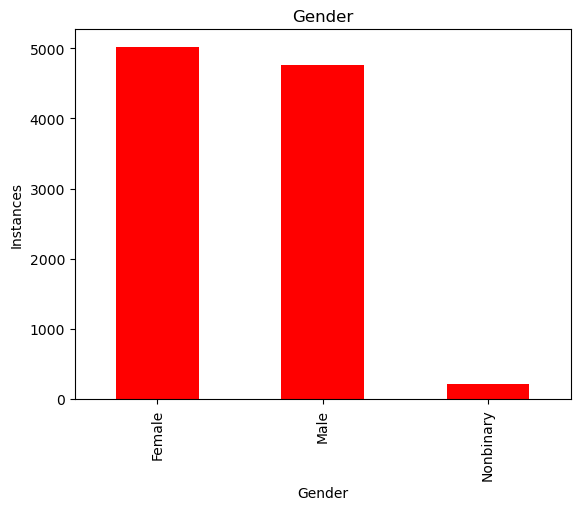

In [74]:
# Gender

df_medical['Gender'].value_counts().plot(kind='bar', color="Red", xlabel='Gender', ylabel="Instances", title="Gender")

df_medical['Gender'].value_counts()

Marital
Widowed          2045
Married          2023
Separated        1987
Never Married    1984
Divorced         1961
Name: count, dtype: int64

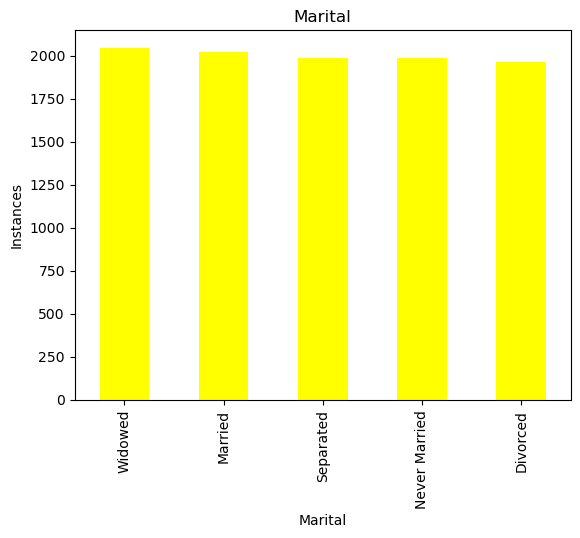

In [75]:
# Marital

df_medical['Marital'].value_counts().plot(kind='bar', color="Yellow", xlabel='Marital', ylabel="Instances", title="Marital")

df_medical['Marital'].value_counts()

In [76]:
# Bivariate Analysis - Visualizations and Statistics

<Axes: xlabel='Services', ylabel='TotalCharge'>

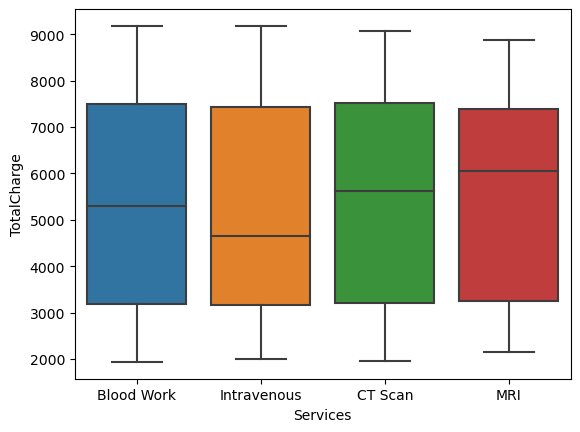

In [77]:
# TotalCharge and Services

sns.boxplot(x='Services', y='TotalCharge', data=df_medical)

<Axes: xlabel='Initial_admin', ylabel='TotalCharge'>

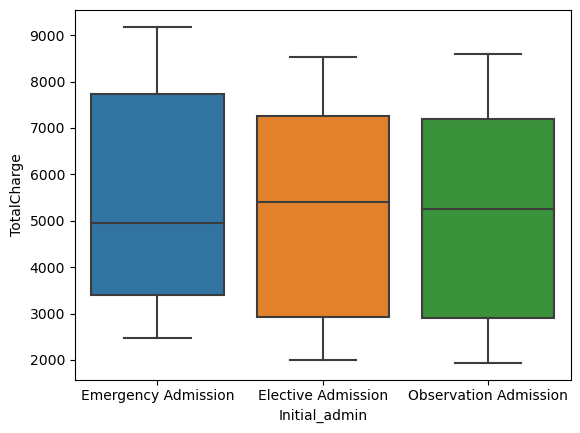

In [78]:
# TotalCharge and Initial_admin

sns.boxplot(x='Initial_admin', y='TotalCharge', data=df_medical)

<Axes: xlabel='Gender', ylabel='TotalCharge'>

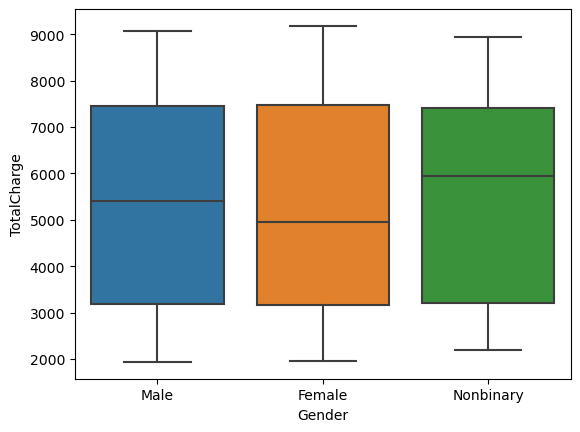

In [79]:
# TotalCharge and Gender

sns.boxplot(x='Gender', y='TotalCharge', data=df_medical)

<Axes: xlabel='Marital', ylabel='TotalCharge'>

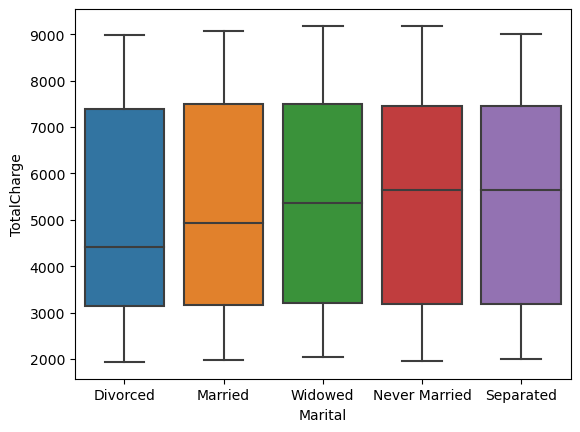

In [80]:
# TotalCharge and Marital

sns.boxplot(x='Marital', y='TotalCharge', data=df_medical)

In [81]:
# Creating new datadrame for categorical variables to get summary statistics

sum_stats_cat_df = pd.DataFrame(df_medical[['Initial_admin','Services','Gender','Marital']])

In [82]:
# Reclassifying categorical variables to numbers

sum_stats_cat_df['Services'].replace(['Blood Work', 'Intravenous', 'CT Scan', 'MRI'], [0, 1, 2, 3], inplace=True)
sum_stats_cat_df['Initial_admin'].replace(['Emergency Admission', 'Elective Admission', 'Observation Admission'], [0, 1, 2], inplace=True)
sum_stats_cat_df['Gender'].replace(['Male', 'Female', 'Nonbinary'], [0, 1, 2], inplace=True)
sum_stats_cat_df['Marital'].replace(['Divorced', 'Married', 'Widowed','Never Married','Separated'], [0, 1, 2, 3, 4], inplace=True)

C:\Users\bower\AppData\Local\Temp\ipykernel_24084\2273328267.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sum_stats_cat_df['Services'].replace(['Blood Work', 'Intravenous', 'CT Scan', 'MRI'], [0, 1, 2, 3], inplace=True)
C:\Users\bower\AppData\Local\Temp\ipykernel_24084\2273328267.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('

In [83]:
sum_stats_cat_df['Services'].describe()

count    10000.000000
mean         0.672000
std          0.832758
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: Services, dtype: float64

In [84]:
sum_stats_cat_df['Initial_admin'].describe()

count    10000.000000
mean         0.737600
std          0.825115
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          2.000000
Name: Initial_admin, dtype: float64

In [85]:
sum_stats_cat_df['Gender'].describe()

count    10000.000000
mean         0.544600
std          0.539296
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          2.000000
Name: Gender, dtype: float64

In [86]:
sum_stats_cat_df['Marital'].describe()

count    10000.000000
mean         2.001300
std          1.407159
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          4.000000
Name: Marital, dtype: float64

In [87]:
# Services statistics

df_medical['Services'].describe()

count          10000
unique             4
top       Blood Work
freq            5265
Name: Services, dtype: object

In [88]:
# Initial_admin statistics

df_medical['Initial_admin'].describe()

count                   10000
unique                      3
top       Emergency Admission
freq                     5060
Name: Initial_admin, dtype: object

In [89]:
# Gender statistics

df_medical['Gender'].describe()

count      10000
unique         3
top       Female
freq        5018
Name: Gender, dtype: object

In [90]:
# Marital statistics

df_medical['Marital'].describe()

count       10000
unique          5
top       Widowed
freq         2045
Name: Marital, dtype: object

In [91]:
# Get Dummies

services_dummies = pd.get_dummies(df_medical['Services'], drop_first=True, dtype=int)
services_dummies

,CT Scan,Intravenous,MRI
0,0,0,0
1,0,1,0
2,0,0,0
3,0,0,0
4,1,0,0
...,...,...,...
9995,0,1,0
9996,1,0,0
9997,0,1,0
9998,0,0,0


In [92]:
initial_admin_dummies = pd.get_dummies(df_medical['Initial_admin'], drop_first=True, dtype=int)
initial_admin_dummies

,Emergency Admission,Observation Admission
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0
...,...,...
9995,1,0
9996,0,0
9997,0,0
9998,1,0


In [93]:
gender_dummies = pd.get_dummies(df_medical['Gender'], drop_first=True, dtype=int)
gender_dummies

,Male,Nonbinary
0,1,0
1,0,0
2,0,0
3,1,0
4,0,0
...,...,...
9995,1,0
9996,1,0
9997,0,0
9998,1,0


In [94]:
marital_dummies = pd.get_dummies(df_medical['Marital'], drop_first=True, dtype=int)
marital_dummies

,Married,Never Married,Separated,Widowed
0,0,0,0,0
1,1,0,0,0
2,0,0,0,1
3,1,0,0,0
4,0,0,0,1
...,...,...,...,...
9995,0,0,0,1
9996,0,0,0,1
9997,0,0,1,0
9998,0,0,0,0


In [95]:
# Insert dummies into dataframe with other independent variables

df_medical = pd.concat([df_medical, services_dummies], axis=1)
df_medical

,TotalCharge,Age,Income,VitD_levels,Doc_visits,Initial_days,Additional_charges,Initial_admin,Services,Gender,Children,Marital,CT Scan,Intravenous,MRI
0,3726.702860,53,86575.93,19.141466,6,10.585770,17939.403420,Emergency Admission,Blood Work,Male,1.0,Divorced,0,0,0
1,4193.190458,51,46805.99,18.940352,4,15.129562,17612.998120,Emergency Admission,Intravenous,Female,3.0,Married,0,1,0
2,2434.234222,53,14370.14,18.057507,4,4.772177,17505.192460,Elective Admission,Blood Work,Female,3.0,Widowed,0,0,0
3,2127.830423,78,39741.49,16.576858,4,1.714879,12993.437350,Elective Admission,Blood Work,Male,0.0,Married,0,0,0
4,2113.073274,22,1209.56,17.439069,5,1.254807,3716.525786,Elective Admission,CT Scan,Female,1.0,Widowed,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,6850.942000,25,45967.61,16.980860,4,51.561220,8927.642000,Emergency Admission,Intravenous,Male,2.0,Widowed,0,1,0
9996,7741.690000,87,14983.02,18.177020,5,68.668240,10280.672745,Elective Admission,CT Scan,Male,4.0,Widowed,1,0,0
9997,8276.481000,45,65917.81,17.129070,4,70.154180,15281.210000,Elective Admission,Intravenous,Female,3.0,Separated,0,1,0
9998,7644.483000,43,29702.32,19.910430,5,63.356900,7781.678000,Emergency Admission,Blood Work,Male,3.0,Divorced,0,0,0


In [96]:
df_medical = pd.concat([df_medical, initial_admin_dummies], axis=1)
df_medical

,TotalCharge,Age,Income,VitD_levels,Doc_visits,Initial_days,Additional_charges,Initial_admin,Services,Gender,Children,Marital,CT Scan,Intravenous,MRI,Emergency Admission,Observation Admission
0,3726.702860,53,86575.93,19.141466,6,10.585770,17939.403420,Emergency Admission,Blood Work,Male,1.0,Divorced,0,0,0,1,0
1,4193.190458,51,46805.99,18.940352,4,15.129562,17612.998120,Emergency Admission,Intravenous,Female,3.0,Married,0,1,0,1,0
2,2434.234222,53,14370.14,18.057507,4,4.772177,17505.192460,Elective Admission,Blood Work,Female,3.0,Widowed,0,0,0,0,0
3,2127.830423,78,39741.49,16.576858,4,1.714879,12993.437350,Elective Admission,Blood Work,Male,0.0,Married,0,0,0,0,0
4,2113.073274,22,1209.56,17.439069,5,1.254807,3716.525786,Elective Admission,CT Scan,Female,1.0,Widowed,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,6850.942000,25,45967.61,16.980860,4,51.561220,8927.642000,Emergency Admission,Intravenous,Male,2.0,Widowed,0,1,0,1,0
9996,7741.690000,87,14983.02,18.177020,5,68.668240,10280.672745,Elective Admission,CT Scan,Male,4.0,Widowed,1,0,0,0,0
9997,8276.481000,45,65917.81,17.129070,4,70.154180,15281.210000,Elective Admission,Intravenous,Female,3.0,Separated,0,1,0,0,0
9998,7644.483000,43,29702.32,19.910430,5,63.356900,7781.678000,Emergency Admission,Blood Work,Male,3.0,Divorced,0,0,0,1,0


In [97]:
df_medical = pd.concat([df_medical, gender_dummies], axis=1)
df_medical

,TotalCharge,Age,Income,VitD_levels,Doc_visits,Initial_days,Additional_charges,Initial_admin,Services,Gender,Children,Marital,CT Scan,Intravenous,MRI,Emergency Admission,Observation Admission,Male,Nonbinary
0,3726.702860,53,86575.93,19.141466,6,10.585770,17939.403420,Emergency Admission,Blood Work,Male,1.0,Divorced,0,0,0,1,0,1,0
1,4193.190458,51,46805.99,18.940352,4,15.129562,17612.998120,Emergency Admission,Intravenous,Female,3.0,Married,0,1,0,1,0,0,0
2,2434.234222,53,14370.14,18.057507,4,4.772177,17505.192460,Elective Admission,Blood Work,Female,3.0,Widowed,0,0,0,0,0,0,0
3,2127.830423,78,39741.49,16.576858,4,1.714879,12993.437350,Elective Admission,Blood Work,Male,0.0,Married,0,0,0,0,0,1,0
4,2113.073274,22,1209.56,17.439069,5,1.254807,3716.525786,Elective Admission,CT Scan,Female,1.0,Widowed,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,6850.942000,25,45967.61,16.980860,4,51.561220,8927.642000,Emergency Admission,Intravenous,Male,2.0,Widowed,0,1,0,1,0,1,0
9996,7741.690000,87,14983.02,18.177020,5,68.668240,10280.672745,Elective Admission,CT Scan,Male,4.0,Widowed,1,0,0,0,0,1,0
9997,8276.481000,45,65917.81,17.129070,4,70.154180,15281.210000,Elective Admission,Intravenous,Female,3.0,Separated,0,1,0,0,0,0,0
9998,7644.483000,43,29702.32,19.910430,5,63.356900,7781.678000,Emergency Admission,Blood Work,Male,3.0,Divorced,0,0,0,1,0,1,0


In [98]:
df_medical = pd.concat([df_medical, marital_dummies], axis=1)
df_medical

,TotalCharge,Age,Income,VitD_levels,Doc_visits,Initial_days,Additional_charges,Initial_admin,Services,Gender,...,Intravenous,MRI,Emergency Admission,Observation Admission,Male,Nonbinary,Married,Never Married,Separated,Widowed
0,3726.702860,53,86575.93,19.141466,6,10.585770,17939.403420,Emergency Admission,Blood Work,Male,...,0,0,1,0,1,0,0,0,0,0
1,4193.190458,51,46805.99,18.940352,4,15.129562,17612.998120,Emergency Admission,Intravenous,Female,...,1,0,1,0,0,0,1,0,0,0
2,2434.234222,53,14370.14,18.057507,4,4.772177,17505.192460,Elective Admission,Blood Work,Female,...,0,0,0,0,0,0,0,0,0,1
3,2127.830423,78,39741.49,16.576858,4,1.714879,12993.437350,Elective Admission,Blood Work,Male,...,0,0,0,0,1,0,1,0,0,0
4,2113.073274,22,1209.56,17.439069,5,1.254807,3716.525786,Elective Admission,CT Scan,Female,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,6850.942000,25,45967.61,16.980860,4,51.561220,8927.642000,Emergency Admission,Intravenous,Male,...,1,0,1,0,1,0,0,0,0,1
9996,7741.690000,87,14983.02,18.177020,5,68.668240,10280.672745,Elective Admission,CT Scan,Male,...,0,0,0,0,1,0,0,0,0,1
9997,8276.481000,45,65917.81,17.129070,4,70.154180,15281.210000,Elective Admission,Intravenous,Female,...,1,0,0,0,0,0,0,0,1,0
9998,7644.483000,43,29702.32,19.910430,5,63.356900,7781.678000,Emergency Admission,Blood Work,Male,...,0,0,1,0,1,0,0,0,0,0


In [99]:
df_medical_lr = df_medical.drop(['Initial_admin','Services','Gender','Marital','TotalCharge'], axis=1)

df_medical_lr.to_csv("D208_prepared.csv")
# Initial Model: 

# Dependent Variable
y = df_medical.TotalCharge

# Initial independent variables
initial_ind_vars = df_medical_lr[['Age','Income','VitD_levels','Doc_visits','Initial_days','Additional_charges','Children','CT Scan','Intravenous','MRI','Emergency Admission','Observation Admission','Male','Nonbinary','Married','Never Married','Separated','Widowed']]

In [100]:
# Show initial model stats

X = initial_ind_vars
y = df_medical['TotalCharge']

in_model = sm.OLS(y, X)
in_results = in_model.fit()
print(in_results.summary())

                                 OLS Regression Results                                
Dep. Variable:            TotalCharge   R-squared (uncentered):                   0.997
Model:                            OLS   Adj. R-squared (uncentered):              0.997
Method:                 Least Squares   F-statistic:                          2.187e+05
Date:                Wed, 07 Aug 2024   Prob (F-statistic):                        0.00
Time:                        11:46:36   Log-Likelihood:                         -70846.
No. Observations:               10000   AIC:                                  1.417e+05
Df Residuals:                    9982   BIC:                                  1.419e+05
Df Model:                          18                                                  
Covariance Type:            nonrobust                                                  
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

In [101]:
in_results.resid.std(ddof=X.shape[1])

288.60279091192155

In [102]:
# Check for VIF

ind_vars = initial_ind_vars

# VIF DataFrame
vif_df_medical_lr = pd.DataFrame()
vif_df_medical_lr["feature"] = ind_vars.columns

# VIF calculations - checking features for multicollinearity
vif_df_medical_lr["VIF"] = [variance_inflation_factor(ind_vars.values, i)
for i in range(len(ind_vars.columns))]

print(vif_df_medical_lr)

                  feature        VIF
0                     Age  11.436620
1                  Income   4.014404
2             VitD_levels  31.980864
3              Doc_visits  20.036524
4            Initial_days   2.686991
5      Additional_charges  14.784363
6                Children   2.120536
7                 CT Scan   1.232231
8             Intravenous   1.587894
9                     MRI   1.072204
10    Emergency Admission   3.000381
11  Observation Admission   1.952087
12                   Male   1.933085
13              Nonbinary   1.044080
14                Married   1.994799
15          Never Married   1.970255
16              Separated   1.973682
17                Widowed   2.003834


In [103]:
# Remove Age

reduced_ind_vars = ind_vars[['Income','VitD_levels','Doc_visits','Initial_days','Additional_charges','Children','CT Scan','Intravenous','MRI','Emergency Admission','Observation Admission','Male','Nonbinary','Married','Never Married','Separated','Widowed']]

In [104]:
# Check for VIF

ind_vars = reduced_ind_vars

# VIF DataFrame
vif_df_medical_lr = pd.DataFrame()
vif_df_medical_lr["feature"] = ind_vars.columns

# VIF calculations - checking features for multicollinearity
vif_df_medical_lr["VIF"] = [variance_inflation_factor(ind_vars.values, i)
for i in range(len(ind_vars.columns))]

print(vif_df_medical_lr)

                  feature        VIF
0                  Income   4.014267
1             VitD_levels  31.447022
2              Doc_visits  19.988944
3            Initial_days   2.685834
4      Additional_charges   9.539181
5                Children   2.120535
6                 CT Scan   1.232225
7             Intravenous   1.587422
8                     MRI   1.072086
9     Emergency Admission   2.996466
10  Observation Admission   1.951727
11                   Male   1.933081
12              Nonbinary   1.044077
13                Married   1.994340
14          Never Married   1.970042
15              Separated   1.973462
16                Widowed   2.003185


In [105]:
# Remove VitD_levels

reduced_ind_vars = ind_vars[['Income','Doc_visits','Initial_days','Additional_charges','Children','CT Scan','Intravenous','MRI','Emergency Admission','Observation Admission','Male','Nonbinary','Married','Never Married','Separated','Widowed']]

In [106]:
# Check for VIF

ind_vars = reduced_ind_vars

# VIF DataFrame
vif_df_medical_lr = pd.DataFrame()
vif_df_medical_lr["feature"] = ind_vars.columns

# VIF calculations - checking features for multicollinearity
vif_df_medical_lr["VIF"] = [variance_inflation_factor(ind_vars.values, i)
for i in range(len(ind_vars.columns))]

print(vif_df_medical_lr)

                  feature        VIF
0                  Income   3.854306
1              Doc_visits  12.496124
2            Initial_days   2.630573
3      Additional_charges   8.283191
4                Children   2.088152
5                 CT Scan   1.227112
6             Intravenous   1.571940
7                     MRI   1.070107
8     Emergency Admission   2.894545
9   Observation Admission   1.908715
10                   Male   1.902433
11              Nonbinary   1.041481
12                Married   1.923165
13          Never Married   1.889636
14              Separated   1.899626
15                Widowed   1.930547


In [107]:
# Remove Doc_visits

reduced_ind_vars = ind_vars[['Income','Initial_days','Additional_charges','Children','CT Scan','Intravenous','MRI','Emergency Admission','Observation Admission','Male','Nonbinary','Married','Never Married','Separated','Widowed']]

In [108]:
# Check for VIF

ind_vars = reduced_ind_vars

# VIF DataFrame
vif_df_medical_lr = pd.DataFrame()
vif_df_medical_lr["feature"] = ind_vars.columns

# VIF calculations - checking features for multicollinearity
vif_df_medical_lr["VIF"] = [variance_inflation_factor(ind_vars.values, i)
for i in range(len(ind_vars.columns))]

print(vif_df_medical_lr)

                  feature       VIF
0                  Income  3.581031
1            Initial_days  2.556598
2      Additional_charges  6.556821
3                Children  2.041379
4                 CT Scan  1.217083
5             Intravenous  1.552587
6                     MRI  1.068278
7     Emergency Admission  2.741129
8   Observation Admission  1.823025
9                    Male  1.859823
10              Nonbinary  1.038591
11                Married  1.831614
12          Never Married  1.792172
13              Separated  1.804739
14                Widowed  1.836554


In [109]:
# Check p-values with newly reduced model

reduced_ind_vars = initial_ind_vars[['Income','Initial_days','Additional_charges','Children','CT Scan','Intravenous','MRI','Emergency Admission','Observation Admission','Male','Nonbinary','Married','Never Married','Separated','Widowed']].assign(const=1)

In [110]:
X = reduced_ind_vars
y = df_medical['TotalCharge']

in_model = sm.OLS(y, X)
in_results = in_model.fit()
print(in_results.summary())

                            OLS Regression Results                            
Dep. Variable:            TotalCharge   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 6.357e+04
Date:                Wed, 07 Aug 2024   Prob (F-statistic):               0.00
Time:                        11:46:37   Log-Likelihood:                -68213.
No. Observations:               10000   AIC:                         1.365e+05
Df Residuals:                    9984   BIC:                         1.366e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Income                    0.00

In [111]:
# Remove features with p-value greater than 0.05

# Removing Intravenous
reduced_ind_vars = initial_ind_vars[['Income','Initial_days','Additional_charges','Children','CT Scan','MRI','Emergency Admission','Observation Admission','Male','Nonbinary','Married','Never Married','Separated','Widowed']].assign(const=1)

In [112]:
X = reduced_ind_vars
y = df_medical['TotalCharge']

in_model = sm.OLS(y, X)
in_results = in_model.fit()
print(in_results.summary())

                            OLS Regression Results                            
Dep. Variable:            TotalCharge   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 6.812e+04
Date:                Wed, 07 Aug 2024   Prob (F-statistic):               0.00
Time:                        11:46:37   Log-Likelihood:                -68213.
No. Observations:               10000   AIC:                         1.365e+05
Df Residuals:                    9985   BIC:                         1.366e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Income                    0.00

In [113]:
# Removing Widowed

reduced_ind_vars = reduced_ind_vars[['Income','Initial_days','Additional_charges','Children','CT Scan','MRI','Emergency Admission','Observation Admission','Male','Nonbinary','Married','Never Married','Separated']].assign(const=1)

In [114]:
X = reduced_ind_vars
y = df_medical['TotalCharge']

in_model = sm.OLS(y, X)
in_results = in_model.fit()
print(in_results.summary())

                            OLS Regression Results                            
Dep. Variable:            TotalCharge   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 7.337e+04
Date:                Wed, 07 Aug 2024   Prob (F-statistic):               0.00
Time:                        11:46:37   Log-Likelihood:                -68213.
No. Observations:               10000   AIC:                         1.365e+05
Df Residuals:                    9986   BIC:                         1.366e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Income                    0.00

In [115]:
# Remove Male

reduced_ind_vars = reduced_ind_vars[['Income','Initial_days','Additional_charges','Children','CT Scan','MRI','Emergency Admission','Observation Admission','Nonbinary','Married','Never Married','Separated']].assign(const=1)

In [116]:
X = reduced_ind_vars
y = df_medical['TotalCharge']

in_model = sm.OLS(y, X)
in_results = in_model.fit()
print(in_results.summary())

                            OLS Regression Results                            
Dep. Variable:            TotalCharge   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 7.949e+04
Date:                Wed, 07 Aug 2024   Prob (F-statistic):               0.00
Time:                        11:46:37   Log-Likelihood:                -68213.
No. Observations:               10000   AIC:                         1.365e+05
Df Residuals:                    9987   BIC:                         1.365e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Income                    0.00

In [117]:
# Remove Separated

reduced_ind_vars = reduced_ind_vars[['Income','Initial_days','Additional_charges','Children','CT Scan','MRI','Emergency Admission','Observation Admission','Nonbinary','Married','Never Married']].assign(const=1)

In [118]:
X = reduced_ind_vars
y = df_medical['TotalCharge']

in_model = sm.OLS(y, X)
in_results = in_model.fit()
print(in_results.summary())

                            OLS Regression Results                            
Dep. Variable:            TotalCharge   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 8.672e+04
Date:                Wed, 07 Aug 2024   Prob (F-statistic):               0.00
Time:                        11:46:37   Log-Likelihood:                -68213.
No. Observations:               10000   AIC:                         1.365e+05
Df Residuals:                    9988   BIC:                         1.365e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Income                    0.00

In [119]:
# Remove Children

reduced_ind_vars = reduced_ind_vars[['Income','Initial_days','Additional_charges','CT Scan','MRI','Emergency Admission','Observation Admission','Nonbinary','Married','Never Married']].assign(const=1)

In [120]:
X = reduced_ind_vars
y = df_medical['TotalCharge']

in_model = sm.OLS(y, X)
in_results = in_model.fit()
print(in_results.summary())

                            OLS Regression Results                            
Dep. Variable:            TotalCharge   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 9.540e+04
Date:                Wed, 07 Aug 2024   Prob (F-statistic):               0.00
Time:                        11:46:37   Log-Likelihood:                -68213.
No. Observations:               10000   AIC:                         1.364e+05
Df Residuals:                    9989   BIC:                         1.365e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Income                    0.00

In [121]:
# Remove MRI

reduced_ind_vars = reduced_ind_vars[['Income','Initial_days','Additional_charges','CT Scan','Emergency Admission','Observation Admission','Nonbinary','Married','Never Married']].assign(const=1)

In [122]:
X = reduced_ind_vars
y = df_medical['TotalCharge']

in_model = sm.OLS(y, X)
in_results = in_model.fit()
print(in_results.summary())

                            OLS Regression Results                            
Dep. Variable:            TotalCharge   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 1.060e+05
Date:                Wed, 07 Aug 2024   Prob (F-statistic):               0.00
Time:                        11:46:37   Log-Likelihood:                -68214.
No. Observations:               10000   AIC:                         1.364e+05
Df Residuals:                    9990   BIC:                         1.365e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Income                    0.00

In [123]:
# Remove Never Married

reduced_ind_vars = reduced_ind_vars[['Income','Initial_days','Additional_charges','CT Scan','Emergency Admission','Observation Admission','Nonbinary','Married']].assign(const=1)

In [124]:
X = reduced_ind_vars
y = df_medical['TotalCharge']

in_model = sm.OLS(y, X)
in_results = in_model.fit()
print(in_results.summary())

                            OLS Regression Results                            
Dep. Variable:            TotalCharge   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 1.192e+05
Date:                Wed, 07 Aug 2024   Prob (F-statistic):               0.00
Time:                        11:46:37   Log-Likelihood:                -68215.
No. Observations:               10000   AIC:                         1.364e+05
Df Residuals:                    9991   BIC:                         1.365e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Income                    0.00

In [125]:
# Remove CT Scan

reduced_ind_vars = reduced_ind_vars[['Income','Initial_days','Additional_charges','Emergency Admission','Observation Admission','Nonbinary','Married']].assign(const=1)

In [126]:
X = reduced_ind_vars
y = df_medical['TotalCharge']

in_model = sm.OLS(y, X)
in_results = in_model.fit()
print(in_results.summary())

                            OLS Regression Results                            
Dep. Variable:            TotalCharge   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 1.362e+05
Date:                Wed, 07 Aug 2024   Prob (F-statistic):               0.00
Time:                        11:46:37   Log-Likelihood:                -68216.
No. Observations:               10000   AIC:                         1.364e+05
Df Residuals:                    9992   BIC:                         1.365e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Income                    0.00

In [127]:
# Remove Nonbinary

reduced_ind_vars = reduced_ind_vars[['Income','Initial_days','Additional_charges','Emergency Admission','Observation Admission','Married']].assign(const=1)

In [128]:
X = reduced_ind_vars
y = df_medical['TotalCharge']

in_model = sm.OLS(y, X)
in_results = in_model.fit()
print(in_results.summary())

                            OLS Regression Results                            
Dep. Variable:            TotalCharge   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 1.589e+05
Date:                Wed, 07 Aug 2024   Prob (F-statistic):               0.00
Time:                        11:46:37   Log-Likelihood:                -68218.
No. Observations:               10000   AIC:                         1.364e+05
Df Residuals:                    9993   BIC:                         1.365e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Income                    0.00

In [129]:
# Remove Married

reduced_ind_vars = reduced_ind_vars[['Income','Initial_days','Additional_charges','Emergency Admission','Observation Admission']].assign(const=1)

In [130]:
X = reduced_ind_vars
y = df_medical['TotalCharge']

in_model = sm.OLS(y, X)
in_results = in_model.fit()
print(in_results.summary())

                            OLS Regression Results                            
Dep. Variable:            TotalCharge   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 1.907e+05
Date:                Wed, 07 Aug 2024   Prob (F-statistic):               0.00
Time:                        11:46:37   Log-Likelihood:                -68219.
No. Observations:               10000   AIC:                         1.365e+05
Df Residuals:                    9994   BIC:                         1.365e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Income                    0.00

In [131]:
ind_vars = reduced_ind_vars

In [132]:
# Classify X and y

X = ind_vars
y = df_medical['TotalCharge']

In [133]:
# Initial X before removing features due to multicollinearity due to VIF > 10
X

,Income,Initial_days,Additional_charges,Emergency Admission,Observation Admission,const
0,86575.93,10.585770,17939.403420,1,0,1
1,46805.99,15.129562,17612.998120,1,0,1
2,14370.14,4.772177,17505.192460,0,0,1
3,39741.49,1.714879,12993.437350,0,0,1
4,1209.56,1.254807,3716.525786,0,0,1
...,...,...,...,...,...,...
9995,45967.61,51.561220,8927.642000,1,0,1
9996,14983.02,68.668240,10280.672745,0,0,1
9997,65917.81,70.154180,15281.210000,0,0,1
9998,29702.32,63.356900,7781.678000,1,0,1


In [134]:
# Final Reduced Model Results: 

md_model = sm.OLS(y, reduced_ind_vars)
md_results = md_model.fit()
print(md_results.summary())

                            OLS Regression Results                            
Dep. Variable:            TotalCharge   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 1.907e+05
Date:                Wed, 07 Aug 2024   Prob (F-statistic):               0.00
Time:                        11:46:37   Log-Likelihood:                -68219.
No. Observations:               10000   AIC:                         1.365e+05
Df Residuals:                    9994   BIC:                         1.365e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Income                    0.00

In [135]:
md_results.resid.std(ddof=X.shape[1])

222.13891996840428

In [136]:
X = reduced_ind_vars

In [137]:
# Updated X after removing features due to multicollinearity issues
X

,Income,Initial_days,Additional_charges,Emergency Admission,Observation Admission,const
0,86575.93,10.585770,17939.403420,1,0,1
1,46805.99,15.129562,17612.998120,1,0,1
2,14370.14,4.772177,17505.192460,0,0,1
3,39741.49,1.714879,12993.437350,0,0,1
4,1209.56,1.254807,3716.525786,0,0,1
...,...,...,...,...,...,...
9995,45967.61,51.561220,8927.642000,1,0,1
9996,14983.02,68.668240,10280.672745,0,0,1
9997,65917.81,70.154180,15281.210000,0,0,1
9998,29702.32,63.356900,7781.678000,1,0,1


In [138]:
# The next few lines of code are testing a split model, not necessarilly required for the task submission

# Create training split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [139]:
lr = LinearRegression()

In [140]:
lr.fit(X_train, y_train)

LinearRegression()

In [141]:
y_intercept = lr.intercept_
y_intercept

2140.5657414058837

In [142]:
z = lr.coef_
z

array([ 7.63771801e-05,  8.18792601e+01,  9.50949375e-03,  5.02287442e+02,
       -1.55550768e+01,  0.00000000e+00])

In [143]:
y_pred_train = lr.predict(X_train)
y_pred_train

array([6825.16017542, 8161.39574483, 2907.93017863, ..., 3288.307813  ,
       8019.68184846, 3680.62890908])

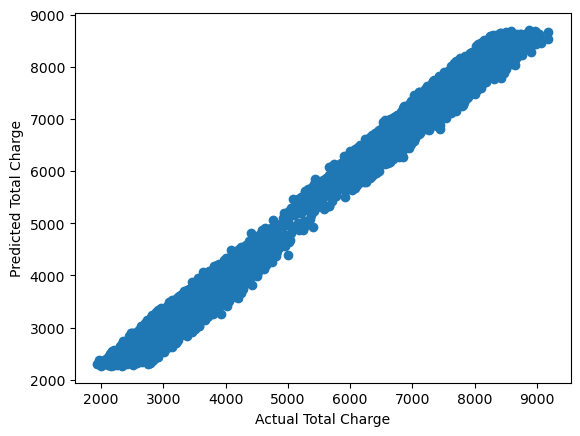

In [144]:
plt.scatter(y_train, y_pred_train)
plt.xlabel("Actual Total Charge")
plt.ylabel("Predicted Total Charge")
plt.show()

In [145]:
# Import R2 score

from sklearn.metrics import r2_score

In [146]:
# R2 score

r2_score(y_train, y_pred_train)

0.9896239574524932

C:\Users\bower\anaconda3\Lib\site-packages\statsmodels\graphics\regressionplots.py:430: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  fig = abline_plot(0, fitted_line.params[0], color='k', ax=ax)


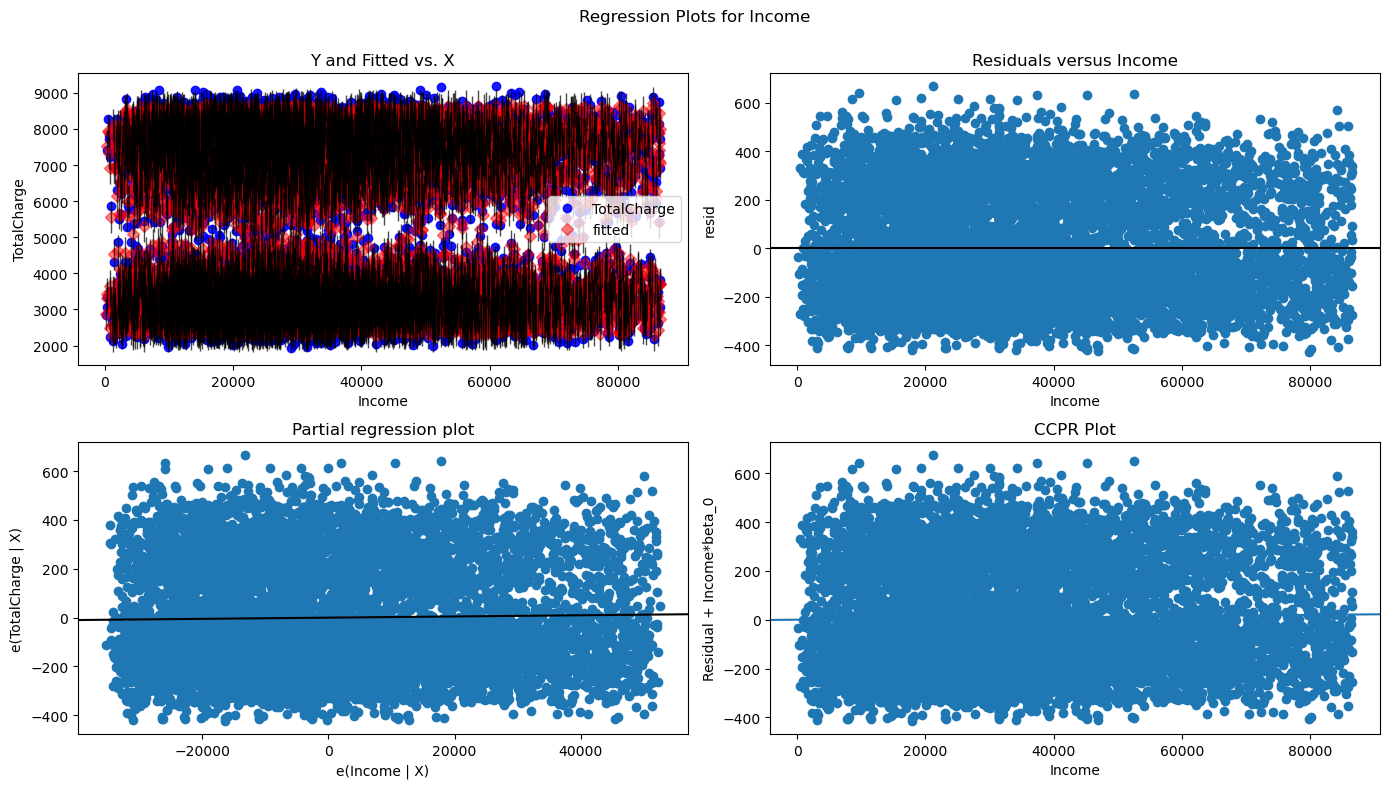

In [147]:
# Residuals for the reduced model features

# Income
fig = plt.figure(figsize = [14,8])

sm.graphics.plot_regress_exog(md_results, 'Income', fig=fig);

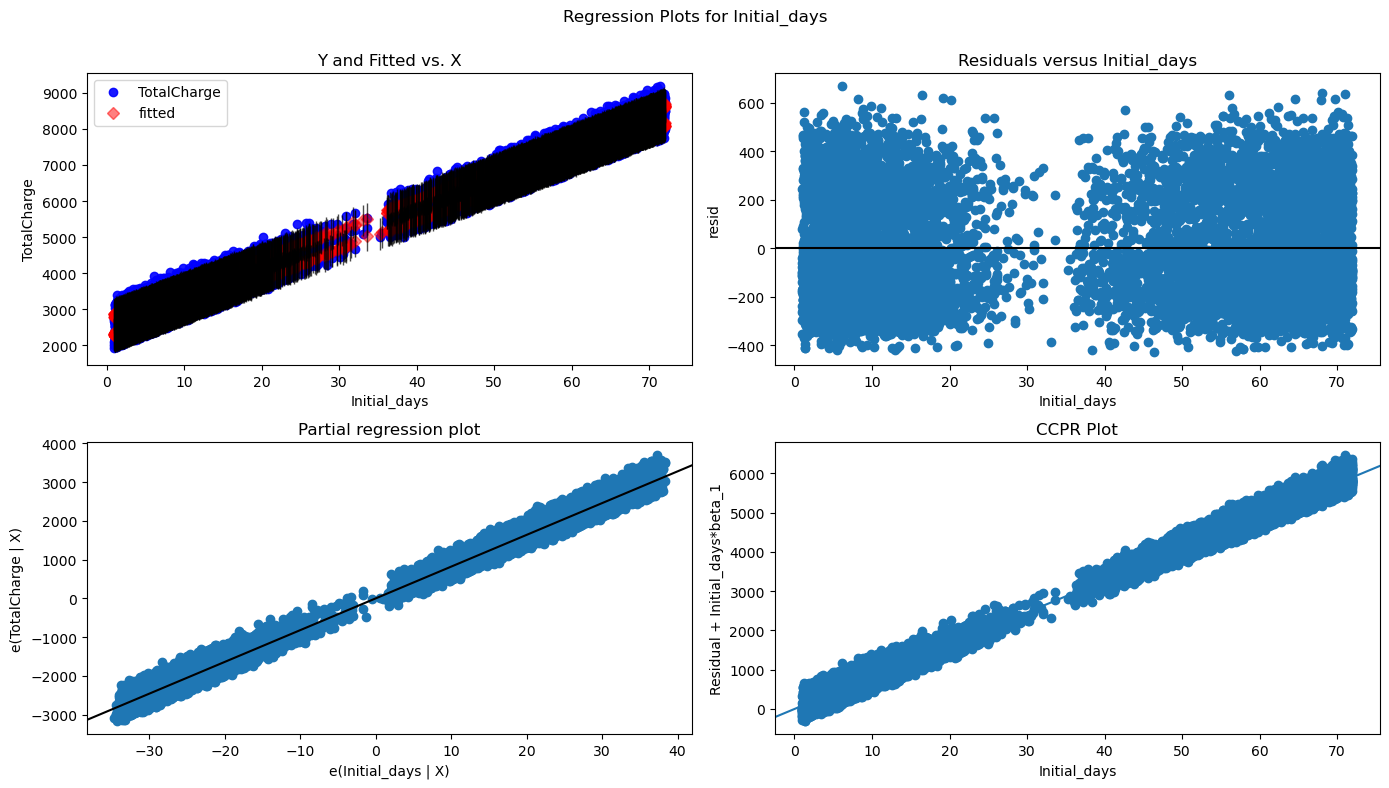

In [148]:
# Initial_days

fig = plt.figure(figsize = [14,8])

sm.graphics.plot_regress_exog(md_results, 'Initial_days', fig=fig);

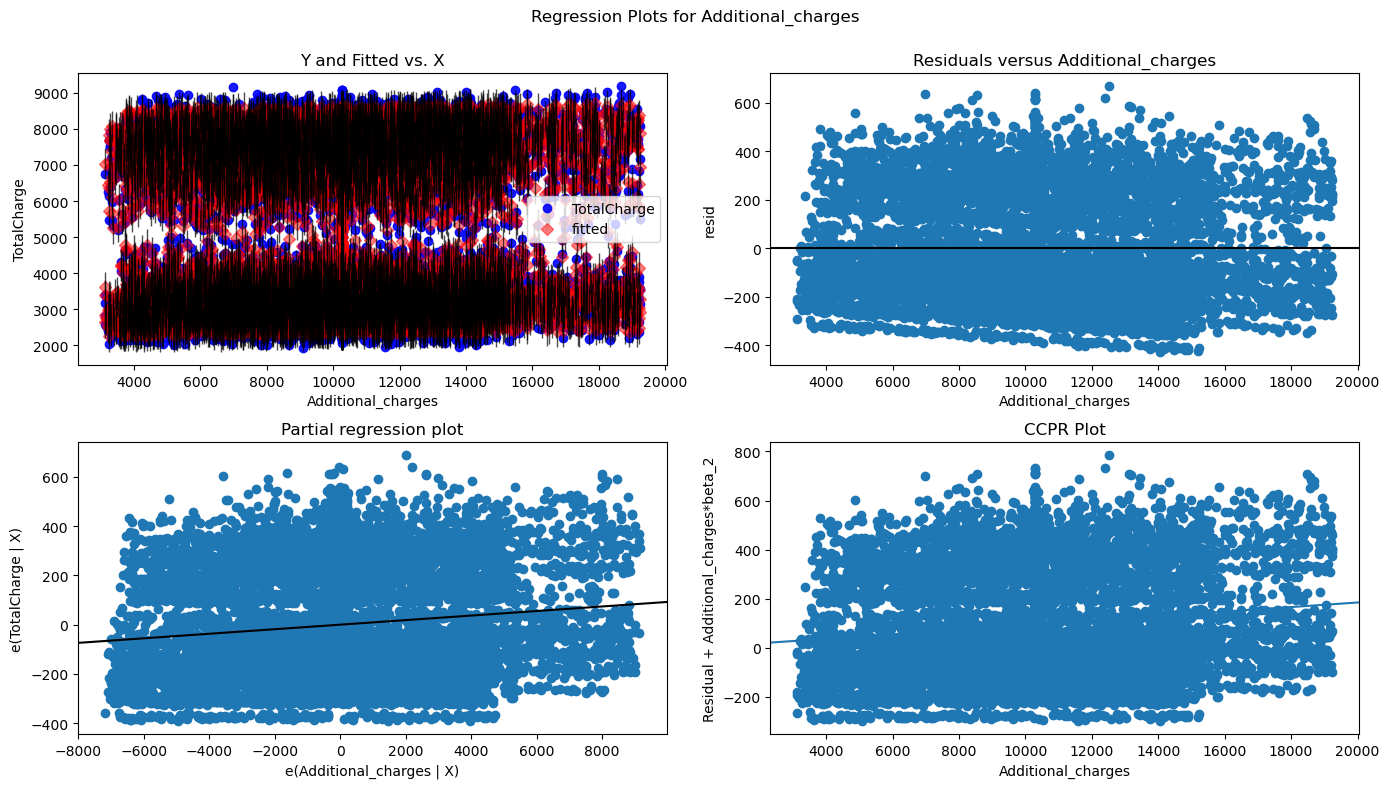

In [149]:
# Additional_charges

fig = plt.figure(figsize = [14,8])

sm.graphics.plot_regress_exog(md_results, 'Additional_charges', fig=fig);

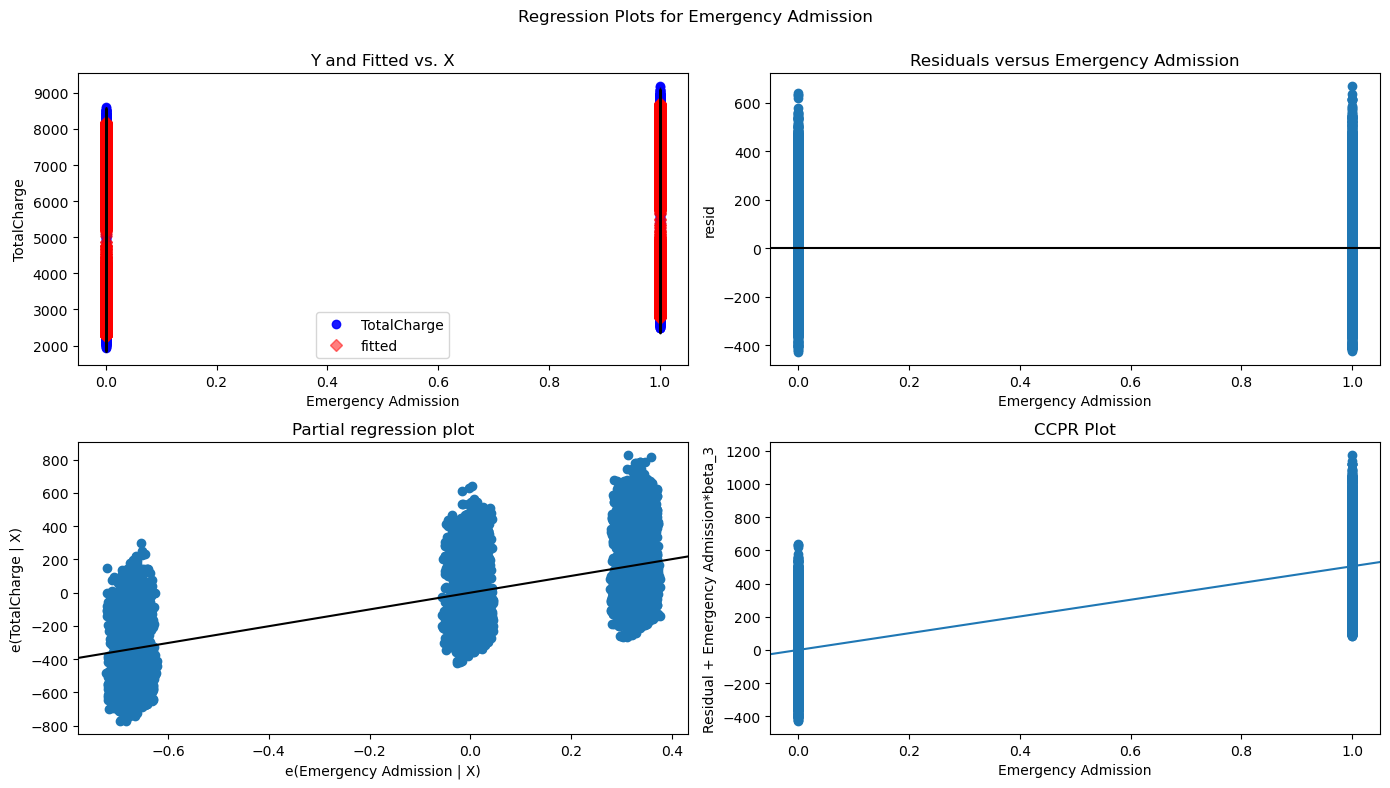

In [150]:
# Emergency Admission

fig = plt.figure(figsize = [14,8])

sm.graphics.plot_regress_exog(md_results, 'Emergency Admission', fig=fig);

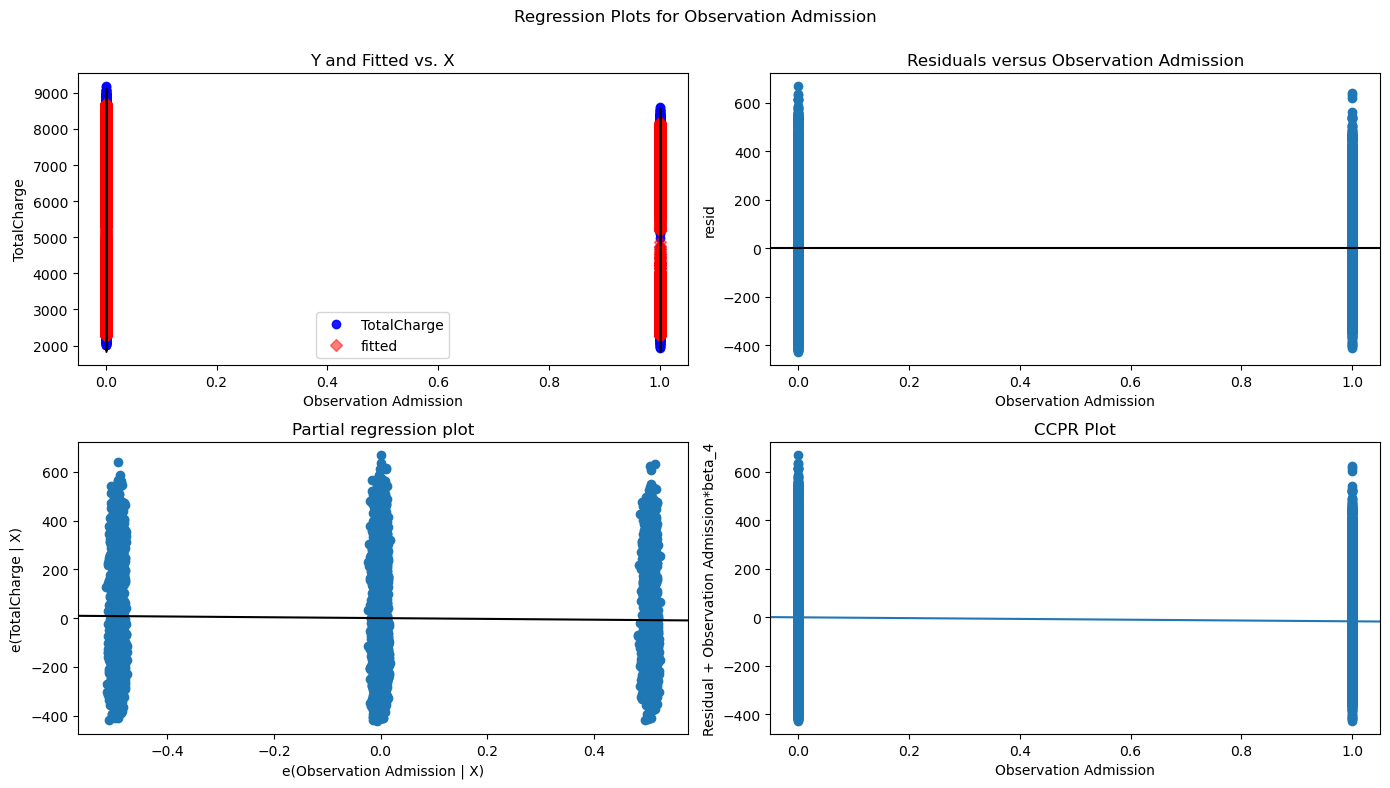

In [151]:
# Observation Admission

fig = plt.figure(figsize = [14,8])

sm.graphics.plot_regress_exog(md_results, 'Observation Admission', fig=fig);

In [152]:
import sys

In [153]:
print(sys.version)

3.11.5 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:26:23) [MSC v.1916 64 bit (AMD64)]
